Importing Dependencies

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pickle
%matplotlib inline

####Loading Dataset

In [188]:
cancer_dataset = pd.read_csv('/content/lung_cancer.csv')
cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


####Analyzing the data

In [189]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [190]:
cancer_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [191]:
 cancer_dataset.duplicated().sum()

33

Dropping duplicate columns


In [192]:
cancer_dataset.drop_duplicates(inplace = True)
cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [193]:
cancer_dataset.shape

(276, 16)

Using label-encoder to encode Lunge Cancer and Gender

In [194]:
encoder = LabelEncoder()
cancer_dataset['LUNG_CANCER'] = encoder.fit_transform(cancer_dataset['LUNG_CANCER'])
cancer_dataset['GENDER'] = encoder.fit_transform(cancer_dataset['GENDER'])
cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In the given Dataset 1 is for No and 2 is for Yes. Converting this 1-2 anology to 0-1 analogy.

In [195]:
cancer_dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

###Basic EDA and analysis of Data

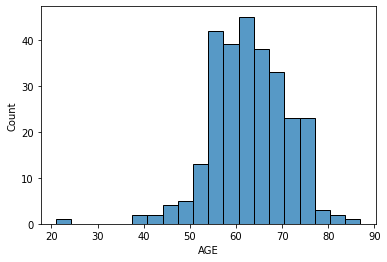

In [196]:
sns.histplot(cancer_dataset['AGE'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


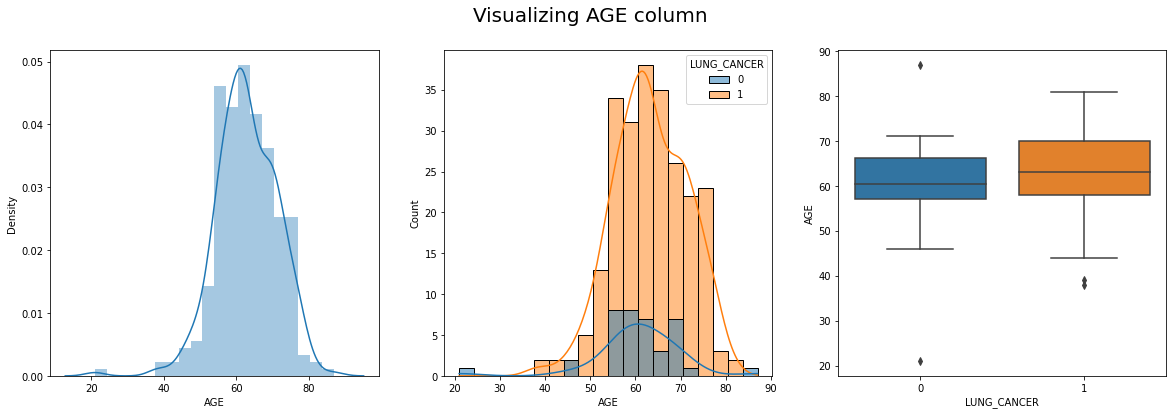

In [197]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(cancer_dataset['AGE'],ax=ax[0])
sns.histplot(data =cancer_dataset,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=cancer_dataset['LUNG_CANCER'],y=cancer_dataset['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

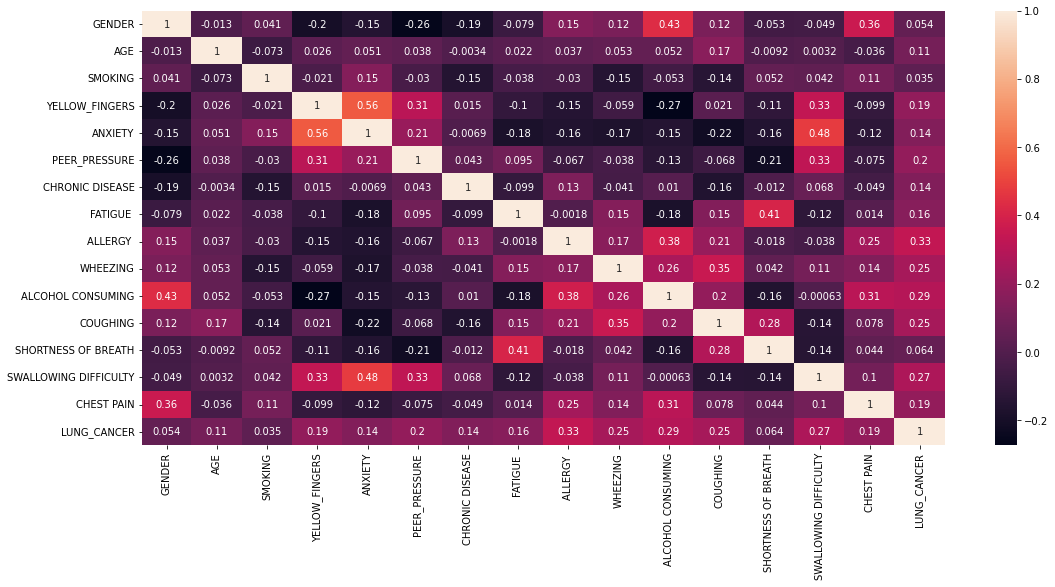

In [198]:
plt.figure(figsize = (18, 8))
sns.heatmap(cancer_dataset.corr(), annot = True)

###Data Prepocessing 

In [199]:
change = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
cancer_dataset[change] = cancer_dataset[change].apply(lambda x: x-1)
cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [200]:
X = cancer_dataset.drop(['LUNG_CANCER'], axis = 1)
y = cancer_dataset['LUNG_CANCER']

Oversampling of Minority Data

In [201]:
X_over, y_over = RandomOverSampler().fit_resample(X, y)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state = 7, test_size = 0.2, stratify = y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (380, 15)
Test shape: (96, 15)


Scaling AGE coloum in dataset

In [203]:
scaler = StandardScaler()
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])
X_test['AGE'] = scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
392,1,-0.269039,0,0,1,1,1,0,0,0,1,0,0,0,0
11,1,1.121911,0,0,0,0,1,1,1,1,1,1,1,0,1
274,1,-1.891814,0,1,1,0,0,0,0,0,0,0,0,1,1
82,0,-0.037214,1,1,1,1,1,0,1,1,1,0,0,1,1
120,0,0.426436,1,1,1,0,1,1,1,1,1,1,1,0,0


###Model Building

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96


Best Params: {'gamma': 100, 'C': 10}



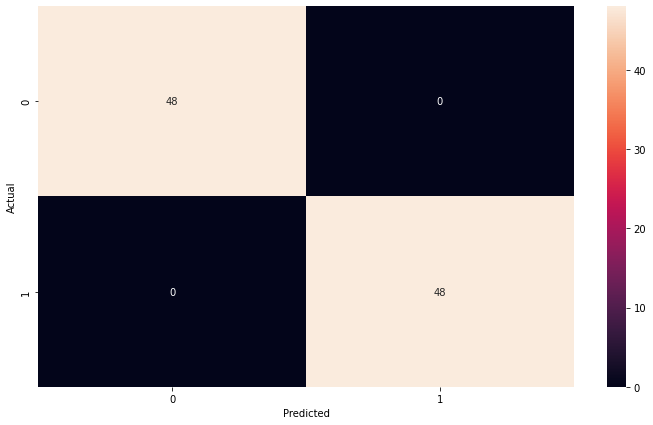

In [204]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
rscv = RandomizedSearchCV(SVC(), param_grid, cv = 5)
rscv.fit(X_train, y_train)
y_pred =  rscv.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 7))
sns.heatmap(cnf_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test, y_pred))
print(f'\nBest Params: {rscv.best_params_}\n')

### Saving the Model

In [205]:
model = SVC(gamma = 100, C = 1)
model.fit(X_train, y_train)
pickle.dump(model, open('lung_cancer.sav', 'wb'))

In [206]:
new_model = pickle.load(open('lung_cancer.sav', 'rb'))
print(new_model)

SVC(C=1, gamma=100)


In [207]:
print(classification_report(new_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [208]:
new_model.predict([[1, 50, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])